In [1]:
import tensorflow as tf

In [2]:
# list tf devices
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import random
from data_loader import load_images_and_labels_without_outliers

In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing and Feature Engineering Data

In [5]:
directory = "caltech-101/101_ObjectCategories"
img_height = 224
img_width = 224

exclude_classes = {"airplanes", "Motorbikes", "Faces", "Faces_easy", "watch", "Leopards"}
images, labels, class_names = load_images_and_labels_without_outliers(directory, img_height, img_width, exclude_classes)

In [6]:
class_names

['accordion',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooster',
 'saxophone',
 'schooner',
 'scissors',
 'scorpion',
 'sea_horse',
 'snoopy',
 'socce

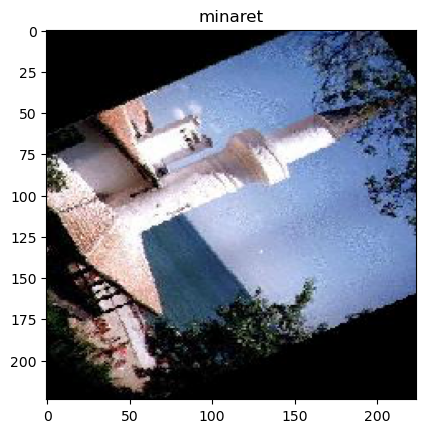

In [7]:
# show a random image
index = random.randint(0, len(images))
plt.imshow(images[index] / 255.0)
plt.title(class_names[labels[index]])
plt.show()

In [8]:
labels

array([ 0,  0,  0, ..., 94, 94, 94])

In [9]:
images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [10]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

unique_classes = np.unique(labels)
target_number_of_images_per_class = 200

balanced_images = []
balanced_labels = []

for class_id in unique_classes:
    class_images = images[labels == class_id]
    class_labels = labels[labels == class_id]
    
    # Add existing images to the balanced dataset
    balanced_images.extend(class_images)
    balanced_labels.extend(class_labels)
    
    # Calculate the number of additional images needed
    num_to_generate = target_number_of_images_per_class - len(class_images)
    
    # Generate additional images using data augmentation
    if num_to_generate > 0:
        augmented_images = []
        augmented_labels = []
        for X_batch, y_batch in datagen.flow(class_images, class_labels, batch_size=num_to_generate):
            augmented_images.extend(X_batch)
            augmented_labels.extend(y_batch)
            if len(augmented_images) >= num_to_generate:
                break
        
        balanced_images.extend(augmented_images[:num_to_generate])
        balanced_labels.extend(augmented_labels[:num_to_generate])

# Convert the balanced dataset to NumPy arrays
balanced_images = np.array(balanced_images)
balanced_labels = np.array(balanced_labels)
balanced_images = balanced_images / 255.0

In [11]:
# free memory
del images
del labels

In [12]:
x_train, x_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, stratify=balanced_labels, random_state=123)
 
print("Class Names:", class_names)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Class Names: ['accordion', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ball', 'stapler', 'starfish', 'stegosaurus', 'stop_sign', 'straw

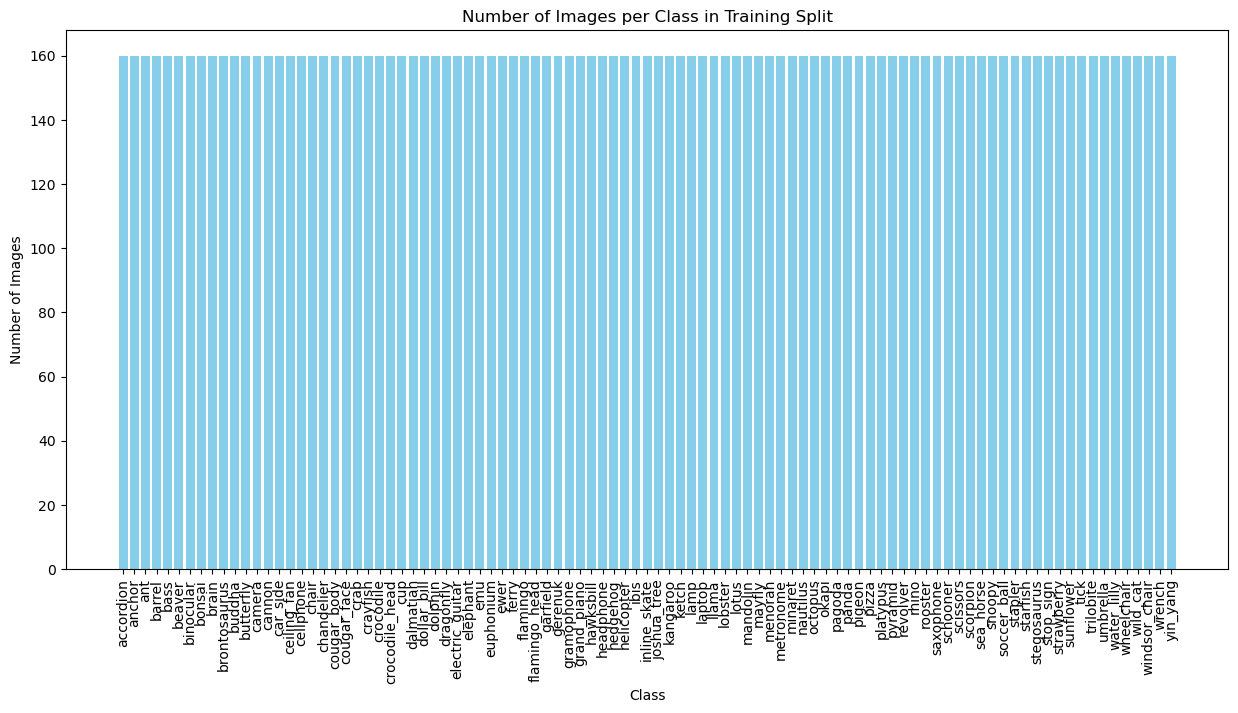

In [13]:
# show number of images per class in the training split - you can see that the dataset is now balanced
plt.figure(figsize=(15, 7))
plt.bar(class_names, np.bincount(y_train), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Training Split')
plt.show()

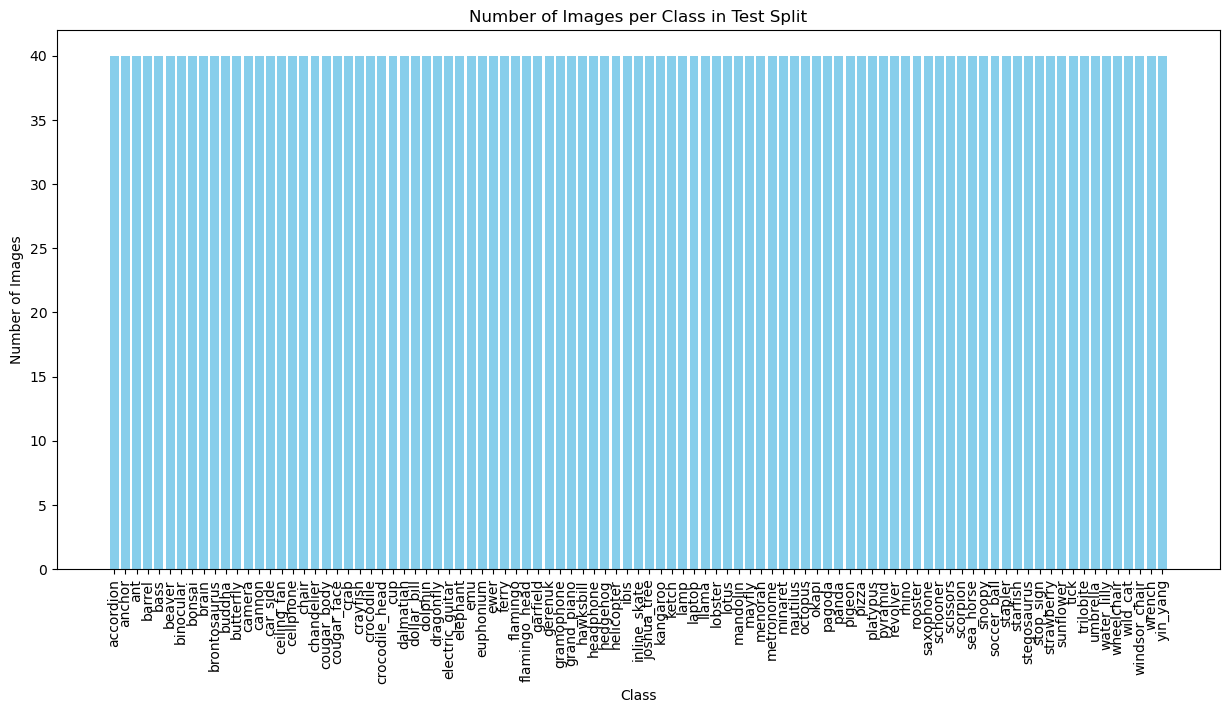

In [14]:
# show number of images per class in the test split - you can see that the dataset is now balanced
plt.figure(figsize=(15, 7))
plt.bar(class_names, np.bincount(y_test), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Test Split')
plt.show()

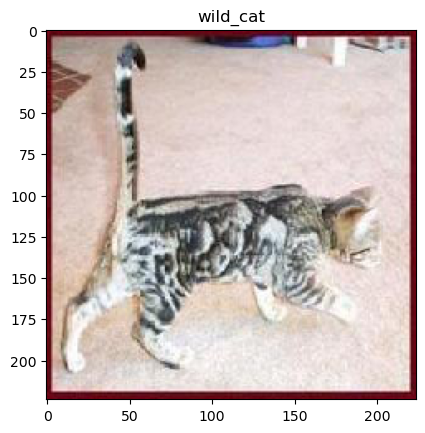

In [15]:
# show a random augmented image
index = random.randint(0, len(balanced_images))
plt.imshow(balanced_images[index])
plt.title(class_names[balanced_labels[index]])
plt.show()

In [16]:
# using way too much memory - delete old variables from notebook to free up memory and envoke garbage collection
del balanced_images
del balanced_labels
import gc 
gc.collect()

38902

# Use transfer learning to improve results and stop overfitting

As we can see above, using the pretrained model has helped stop the overfitting, but our evaluation accuracy is plateauing at just over 60%. Let's fix that by adjusting the layers.

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

base_model.trainable = False

# unfreeze the last layers of the base model
for layer in base_model.layers[-8:]:
    layer.trainable = True

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

batch_size = 32

learning_rate = 0.001 * (batch_size / 32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="resnet50_final.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    mode="auto",
    restore_best_weights=True,
    verbose=1,
)

reduce_learning_rate_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.5,
    patience=3,
    mode="auto",
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    x_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

76/76 [==============================] - 3s 40ms/step - loss: 1.8769 - accuracy: 0.5991
Test accuracy: 0.5990954041481018


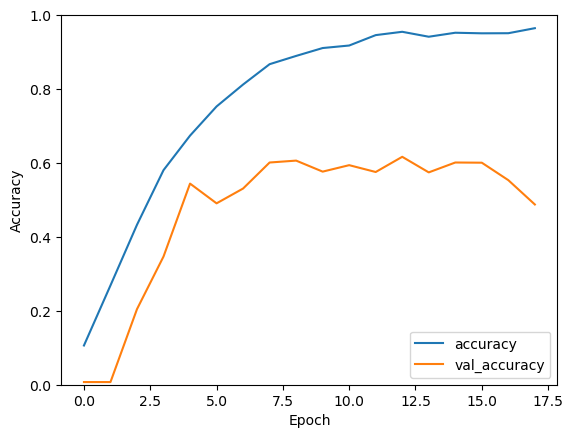

In [ ]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show() 